In [11]:
# LOADING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

In [12]:
#  LOADING DATASET
df=pd.read_csv('/content/mushroom.csv')

In [13]:
# @title PEFORMING EDA
#checking dataset with all columns
pd.set_option('display.max_columns',None)
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


Looking at the dataset

Classification of the mushroom as edible or poisonous is needed.

Hence target column is 'class'.

In [14]:
# check no of rows and columns
df.shape
# 2000 rows and 26 columns

(2000, 26)

In [15]:
# checking for null values and data types
df.info()
# 0 null values
# 3 numerical columns and 23 object columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [16]:
# checking object columns basic information
df.describe(include='object')

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,5,4,9,2,9,4,3,2,12,2,7,4,4,9,9,2,4,3,8,9,6,7,2
top,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,enlarging,bulbous,fibrous,silky,brown,orange,universal,white,one,sheathing,brown,abundant,urban,poisonous
freq,439,568,263,1023,274,540,677,1007,216,1040,336,555,522,271,259,1010,553,689,305,255,360,316,1400


In [17]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [18]:
# checking for duplicates
df.duplicated().sum()

1024

In [19]:
#dropping unamed column as it is unnecessary.
df.drop('Unnamed: 0',inplace=True,axis=1)

In [20]:
exact_duplicates=df[df.duplicated()]
print(f'Number of exact duplicates:{exact_duplicates.shape[0]}')

Number of exact duplicates:1024


In [21]:
exact_duplicates

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,bell,smooth,pink,no,foul,notched,distant,broad,pink,enlarging,rooted,smooth,fibrous,brown,pink,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,enlarging,rooted,fibrous,fibrous,red,red,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,conical,grooves,brown,no,foul,free,distant,broad,white,tapering,rooted,smooth,fibrous,buff,gray,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,sunken,smooth,white,no,anise,attached,crowded,broad,black,tapering,bulbous,scaly,scaly,orange,red,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,enlarging,bulbous,scaly,fibrous,white,buff,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,flat,scaly,pink,no,spicy,attached,distant,narrow,red,enlarging,bulbous,silky,smooth,brown,yellow,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,bulbous,silky,silky,pink,orange,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,missing,smooth,silky,brown,red,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [22]:
exact_duplicates.sample(50)

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
932,bell,scaly,white,yes,foul,free,crowded,narrow,green,enlarging,missing,fibrous,fibrous,red,gray,universal,orange,two,flaring,yellow,solitary,paths,poisonous,12.557712,9.039947
1398,flat,fibrous,white,yes,spicy,free,crowded,broad,purple,tapering,missing,scaly,silky,white,yellow,partial,brown,one,sheathing,green,solitary,waste,poisonous,12.559680,17.679901
1492,conical,scaly,red,yes,pungent,free,distant,broad,purple,enlarging,cup,scaly,fibrous,pink,pink,partial,orange,one,large,white,numerous,woods,poisonous,10.943376,12.676809
1853,sunken,scaly,purple,yes,pungent,notched,crowded,broad,red,tapering,club,silky,scaly,cinnamon,white,partial,brown,none,flaring,buff,solitary,urban,poisonous,11.331373,16.923718
518,bell,grooves,gray,yes,musty,notched,crowded,broad,chocolate,tapering,bulbous,fibrous,scaly,white,white,universal,brown,two,sheathing,buff,clustered,leaves,poisonous,3.846000,22.788126
1630,bell,fibrous,pink,no,almond,attached,distant,narrow,gray,enlarging,club,silky,silky,orange,cinnamon,universal,orange,one,evanescent,chocolate,several,waste,edible,6.296190,4.648709
961,bell,grooves,brown,yes,anise,free,close,narrow,brown,enlarging,equal,fibrous,scaly,cinnamon,cinnamon,partial,white,two,none,brown,several,urban,poisonous,6.049963,20.349566
1191,conical,grooves,red,yes,musty,attached,distant,narrow,red,tapering,cup,scaly,smooth,white,white,universal,orange,two,sheathing,purple,several,urban,poisonous,2.375016,7.471336
1620,convex,smooth,buff,yes,foul,attached,crowded,narrow,gray,enlarging,missing,scaly,smooth,gray,gray,universal,brown,none,large,green,several,waste,poisonous,11.814241,19.868822
1144,sunken,smooth,gray,yes,anise,free,distant,broad,yellow,tapering,cup,silky,silky,yellow,pink,universal,brown,two,pendant,orange,solitary,leaves,poisonous,13.596098,6.417737


In [23]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [24]:
df.shape # Successfully removed duplicate rows.

(976, 25)

Text(0.5, 1.0, 'Count of edible and poisonous mushrooms')

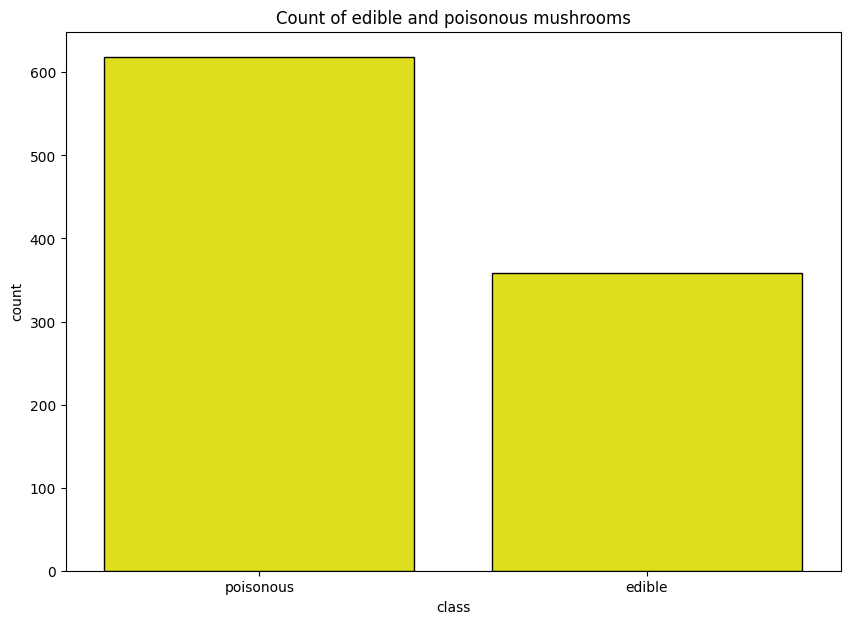

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['class'],color='yellow',edgecolor='black')
plt.title('Count of edible and poisonous mushrooms')

Text(0.5, 1.0, 'Boxplot of stalk height')

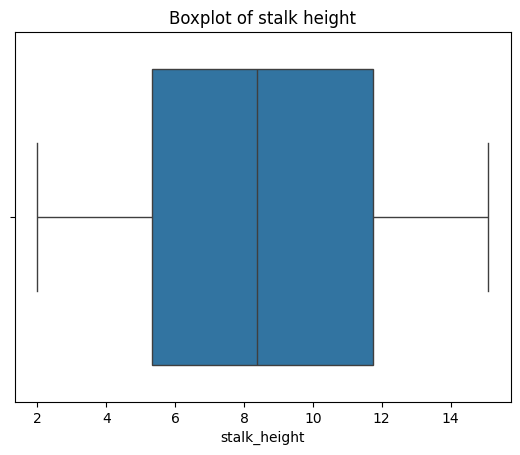

In [29]:
sns.boxplot(df['stalk_height'],orient='h')
plt.title('Boxplot of stalk height')

Text(0.5, 1.0, 'Boxplot of cap diameter')

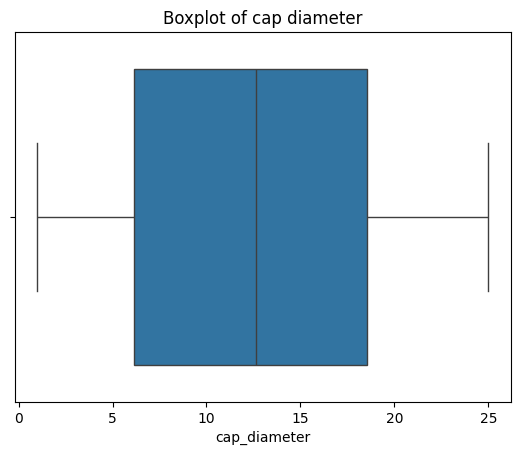

In [30]:
sns.boxplot(df['cap_diameter'],orient='h')
plt.title('Boxplot of cap diameter')

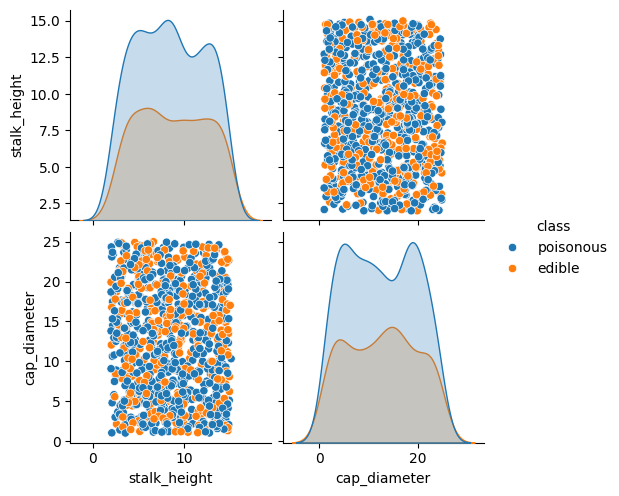

In [31]:
sns.pairplot(df,hue='class')

Text(0.5, 1.0, 'Violinplot of stalk height & cap diameter')

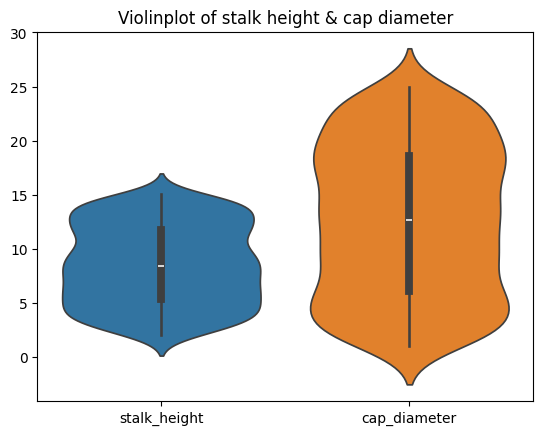

In [32]:
sns.violinplot(df)
plt.title('Violinplot of stalk height & cap diameter')

Text(0.5, 1.0, 'Histogram of cap diameter')

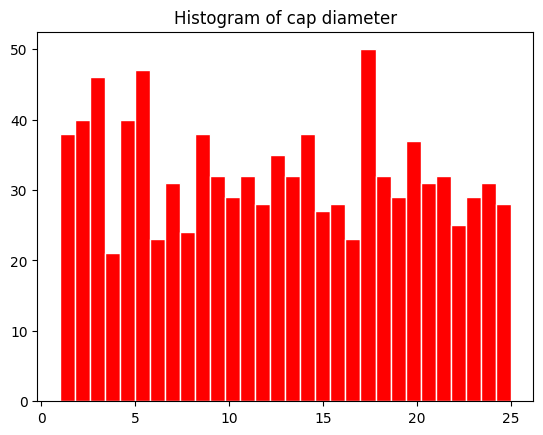

In [38]:
plt.hist(df['cap_diameter'],bins=30,edgecolor='white',color='red')
plt.title('Histogram of cap diameter')

Text(0.5, 1.0, 'Histogram of stalk height')

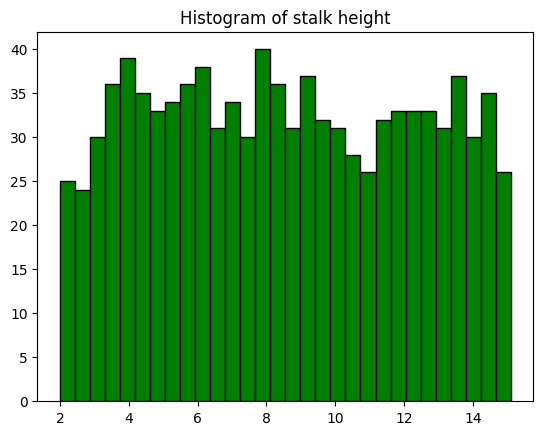

In [36]:
plt.hist(df['stalk_height'],bins=30,edgecolor='black',color='green')
plt.title('Histogram of stalk height')

Text(0.5, 1.0, 'feature correlation matrix')

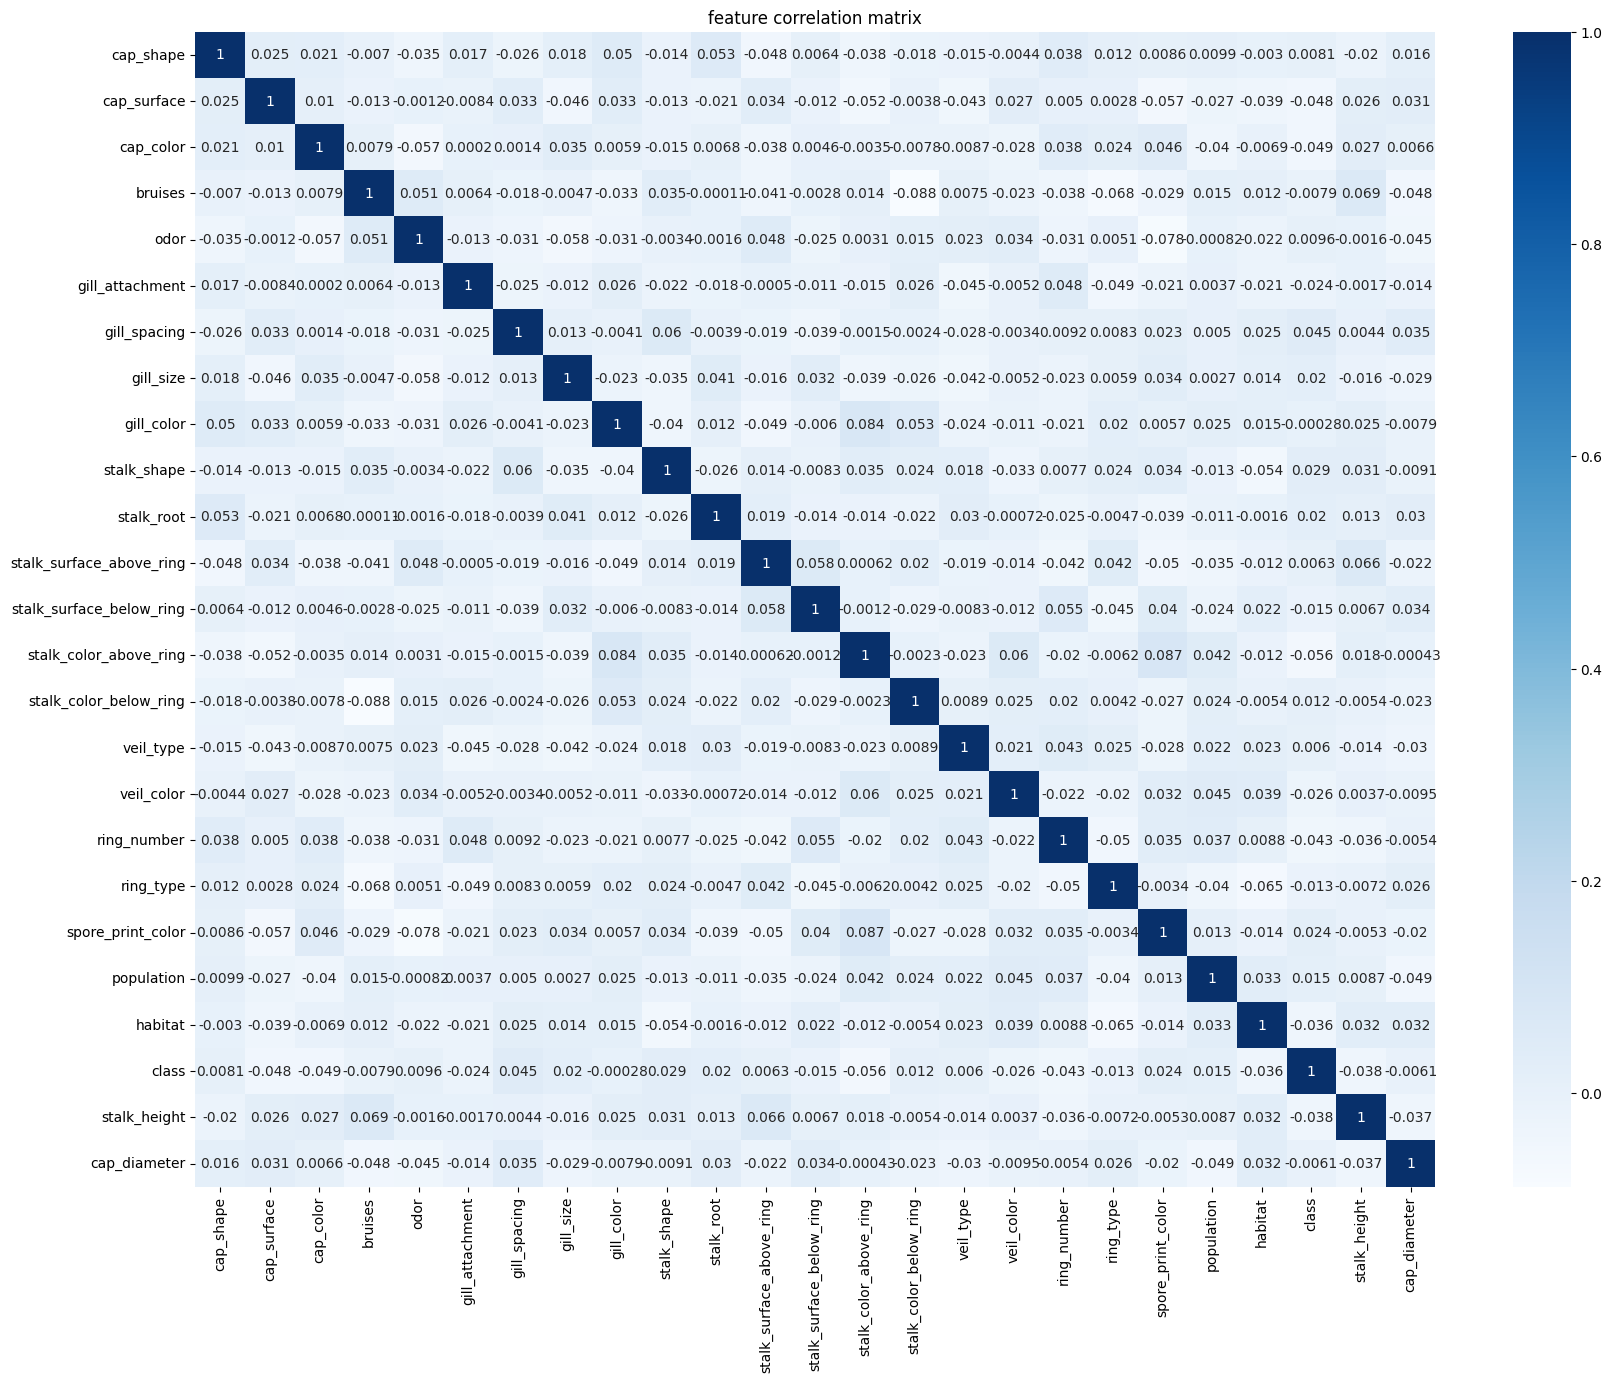

In [39]:
# encoding categorical variables for correlation and also performing encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_encoded=df.apply(le.fit_transform)
plt.figure(figsize=(20,15))
sns.heatmap(df_encoded.corr(),annot=True,cmap='Blues')
plt.title('feature correlation matrix')

In [40]:
#splitting dataset into x and y
x=df_encoded.drop('class',axis=1)
y=df['class']

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [42]:
# @title IMPLEMENTING BASIC SVM CLASSIFIER
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1.0,random_state =42)
model.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [43]:
y_pred_train=model.predict(x_train)  # predicting training and testing.
y_pred_test=model.predict(x_test)

In [46]:
print("Accuracy:",accuracy_score(y_test,y_pred_test))

print("Classification Report:\n",classification_report(y_test,y_pred_test))

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_test))

Accuracy: 0.6382252559726962
Classification Report:
               precision    recall  f1-score   support

      edible       0.00      0.00      0.00       106
   poisonous       0.64      1.00      0.78       187

    accuracy                           0.64       293
   macro avg       0.32      0.50      0.39       293
weighted avg       0.41      0.64      0.50       293

Confusion Matrix:
 [[  0 106]
 [  0 187]]


In [47]:
# @title HYPERPARAMETER TUNNING
parameters={'C':[0.1,1,10],
            'kernel':['linear','rbf','poly']}
for C in parameters['C']:
  for kernel in parameters['kernel']:
    model=SVC(C=C,kernel=kernel,random_state=42)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

In [48]:
print(f"kernel:{kernel},C:{C}")

kernel:poly,C:10


In [49]:
accuracy_score(y_test,y_pred)

0.6382252559726962

**Strength and Weakness:**

SVM can handle high dimensional spaces effectively and efficiently which is useful for dataset with large no of features.

Weakness- svm are sensitive to the chocies of hyperparameters like kernel , c , gamma values.

SVM does not perform well with noisy data.


**Real World Application-**

Choosing the right kernel is very crucial.

SVM require significant computional resources, especially for large dataset.

One of the advantages of svm is its robust nature and avoiding over fitting.

In [50]:
# THANK YOU !!!